# Loading Data


Hasil Loading Berkas Paylater Loan Data.csv menggunakan url Google Drive

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

id = '1j9CeO2EmFjPYqj7tyvBPkWM3CAWD-Hrj'

url = 'https://drive.google.com/uc?id={}&export=download'.format(id)
df = pd.read_csv(url,  dtype={'loanId': str})

# Data Profilling


Untuk melihat tampilan tabel dataset dari 5 row teratas

In [ ]:
df.head()

,loanId,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStatus,clientTimeAtEmployer,clientNumberPhoneContacts,...,paymentRatio,firstPaymentDefault,loanDefault,loanIncomeRatio,applicationDateMonth,approvalDateMonth,disbursementDateMonth,repaidDateMonth,FirstPaymentDueDateMonth,dueDateMonth
0,PP99804128,66452.66,1,38,MALE,Married,education,Employer Provided,> 36 Months,458.000000,...,0.0,0,0,0.632029,5,5,5,5,6,8
1,PP99781446,35000.00,1,35,MALE,Single,other,Rented,> 36 Months,708.000000,...,0.0,0,0,0.571429,5,5,5,6,6,8
2,PP99274960,162851.11,1,47,FEMALE,Married,education,Own Residence,> 36 Months,622.000000,...,0.0,1,0,0.822837,5,5,5,6,6,8
3,PP97847695,55053.68,1,33,MALE,Single,other,Own Residence,> 36 Months,1289.979347,...,0.0,0,1,0.626661,5,5,5,5,6,8
4,PP97841916,32112.55,1,30,MALE,Single,house,Rented,> 36 Months,608.000000,...,0.0,1,0,0.622809,5,5,5,6,6,8


Untuk melihat tampilan tabel dataset dari 5 row tebawah

In [ ]:
df.tail()

,loanId,clientIncome,incomeVerified,clientAge,clientGender,clientMaritalStatus,clientLoanPurpose,clientResidentialStatus,clientTimeAtEmployer,clientNumberPhoneContacts,...,paymentRatio,firstPaymentDefault,loanDefault,loanIncomeRatio,applicationDateMonth,approvalDateMonth,disbursementDateMonth,repaidDateMonth,FirstPaymentDueDateMonth,dueDateMonth
159591,3.02E+11,97865.00,1,36,FEMALE,Single,business,Family Owned,27-35 Months,4001.0,...,0.0,0,0,1.660451,5,5,5,6,6,11
159592,3.02E+11,35000.00,0,32,FEMALE,Married,business,Rented,> 36 Months,1083.0,...,0.0,0,0,1.142857,5,5,5,6,6,7
159593,3.02E+11,25000.00,0,38,FEMALE,Married,house,Rented,> 36 Months,231.0,...,0.0,0,0,1.000000,5,5,5,6,6,7
159594,3.02E+11,70833.33,1,41,FEMALE,Married,education,Own Residence,> 36 Months,5678.0,...,0.0,0,0,1.192941,5,5,5,6,6,11
159595,3.02E+11,35000.00,0,28,FEMALE,Single,house,Own Residence,> 36 Months,1917.0,...,0.0,0,0,1.071429,5,5,5,6,6,8


## Hilangkan Duplikasi

In [ ]:
df['loanId'].value_counts()

3.02E+11     72613
3.03E+11      9644
302803230        1
302803188        1
302803194        1
             ...  
302998500        1
302998504        1
302998505        1
302998509        1
302258196        1
Name: loanId, Length: 77341, dtype: int64

Tampak Pada atribut 'loadId' terjadi duplikasi yang sangat besar karena terdapat 2 angka yang memiliki nilai pangkat cukup tinggi. Sementara selain 2 nilai tersebut, semua nilainya adalah nilai Unik. Jadi dapat disimpulkan bahwa loanId yang seharusnya adalah semua merupakan nilai unik tanpa duplikasi

In [ ]:
df_copy = df.copy()
df_copy['loanId'] = df_copy.reset_index().index + 1
duplicate_rows = df_copy[df_copy.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [loanId, clientIncome, incomeVerified, clientAge, clientGender, clientMaritalStatus, clientLoanPurpose, clientResidentialStatus, clientTimeAtEmployer, clientNumberPhoneContacts, clientAvgCallsPerDay, loanNumber, loanAmount, interestRate, loanTerm, maxAmountTaken, maxTenorTaken, settleDays, paymentRatio, firstPaymentDefault, loanDefault, loanIncomeRatio, applicationDateMonth, approvalDateMonth, disbursementDateMonth, repaidDateMonth, FirstPaymentDueDateMonth, dueDateMonth]
Index: []

[0 rows x 28 columns]


Sehingga dilakukan reset index loanId dari 1 hingga 159 ribu data (pada df_copy untuk menjaga keaslian data asli) untuk menghilangkan duplikasi yang sangat besar. Dan setelah dilakukan cek duplikasi hasilnya adalah bersih.

## Info data

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120266 entries, 0 to 159595
Data columns (total 36 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   loanId                                     120266 non-null  int64  
 1   clientIncome                               120266 non-null  float64
 2   incomeVerified                             120266 non-null  int64  
 3   clientAge                                  120266 non-null  float64
 4   clientNumberPhoneContacts                  120266 non-null  float64
 5   clientAvgCallsPerDay                       120266 non-null  float64
 6   loanNumber                                 120266 non-null  float64
 7   loanAmount                                 120266 non-null  float64
 8   maxAmountTaken                             120266 non-null  float64
 9   maxTenorTaken                              120266 non-null  float64
 10  settleDa

Dan terlihat bahwa terdapat 28 atribut pada Dataset dengan  record data berjumlah 159 ribu data dan didalamnya terdapat kombinasi Atribut Numerikal dan Kategorikal. Serta memiliki beberapa Type data yaitu Object, int64 dan float64

# Visualisasi

## Visualisasi Target Variabel 'loanDefault'

Jumlah peminjam berdasarkan loanDefault :
0    115321
1     44275
Name: loanDefault, dtype: int64


<AxesSubplot:xlabel='count', ylabel='loanDefault'>

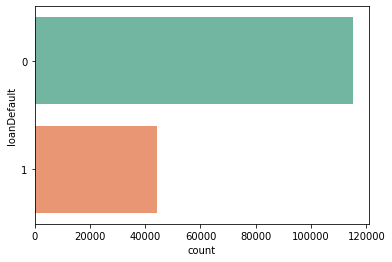

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Jumlah peminjam berdasarkan loanDefault :")
print(df['loanDefault'].value_counts())
sns.countplot(y='loanDefault', data=df, palette='Set2')

Terlihat bahwa pada Atribut yang akan dijadikan Target Variabel dalam Prediksi Persetujuan Pinjaman, loanDefault memiliki 2 nilai angka biner yaitu 0 dan 1. Dengan jumlah yang cukup timpang antara kedua nilai tersebut, maka disimpulkan bahwa atribut ini mengalami imbalance data dan perlu dilakukan handling nantinya agar terhindar dari overfitting yang akan mempengaruhi kinerja modelling.

## Visualisasi Atribut yang berkaitan dengan Profil Pelanggan

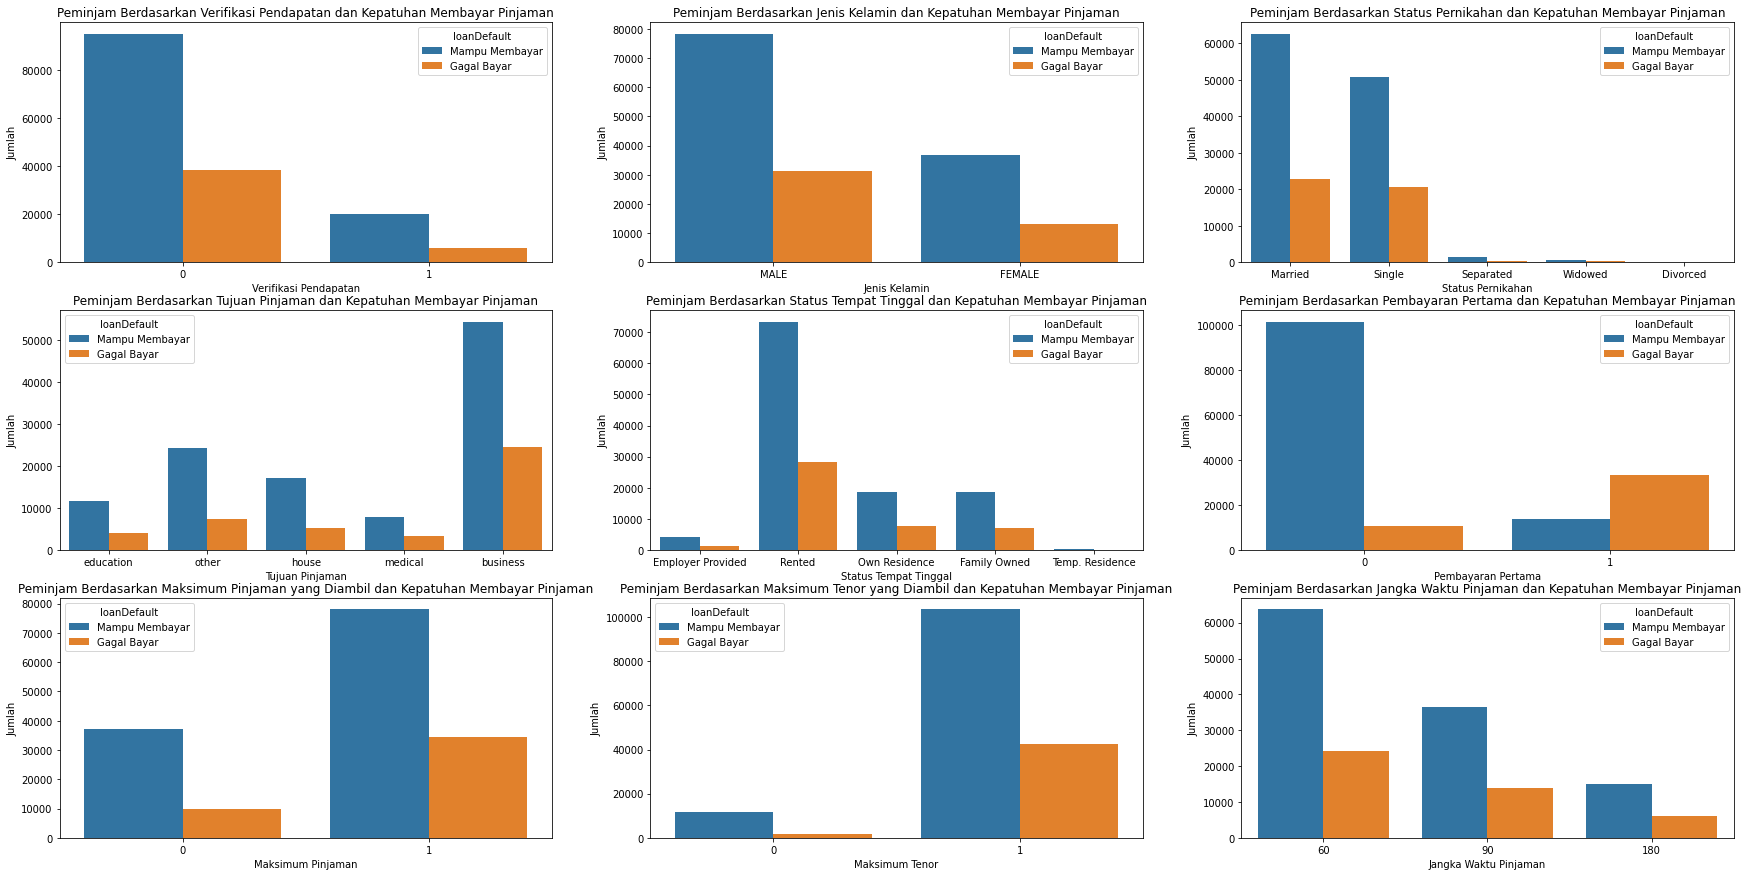

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat salinan dataframe
df_copy = df.copy()

# Mengubah nilai 0 dan 1 pada kolom 'loanDefault' menjadi 'Mampu Membayar' dan 'Gagal Bayar'
df_copy['loanDefault'] = df_copy['loanDefault'].map({0: 'Mampu Membayar', 1: 'Gagal Bayar'})

# Membuat subplot dalam bentuk grafik batang
fig, axs = plt.subplots(3, 3, figsize=(30,15))
sns.countplot(x='incomeVerified', hue='loanDefault', data=df_copy, ax=axs[0,0])
sns.countplot(x='clientGender', hue='loanDefault', data=df_copy, ax=axs[0,1])
sns.countplot(x='clientMaritalStatus', hue='loanDefault', data=df_copy, ax=axs[0,2])
sns.countplot(x='clientLoanPurpose', hue='loanDefault', data=df_copy, ax=axs[1,0])
sns.countplot(x='clientResidentialStatus', hue='loanDefault', data=df_copy, ax=axs[1,1])
sns.countplot(x='firstPaymentDefault', hue='loanDefault', data=df_copy, ax=axs[1,2])
sns.countplot(x='maxAmountTaken', hue='loanDefault', data=df_copy, ax=axs[2,0])
sns.countplot(x='maxTenorTaken', hue='loanDefault', data=df_copy, ax=axs[2,1])
sns.countplot(x='loanTerm', hue='loanDefault', data=df_copy, ax=axs[2,2])

# Menambahkan label pada sumbu x dan y serta judul grafik pada setiap subplot
axs[0,0].set(xlabel='Verifikasi Pendapatan', ylabel='Jumlah', title='Peminjam Berdasarkan Verifikasi Pendapatan dan Kepatuhan Membayar Pinjaman')
axs[0,1].set(xlabel='Jenis Kelamin', ylabel='Jumlah', title='Peminjam Berdasarkan Jenis Kelamin dan Kepatuhan Membayar Pinjaman')
axs[0,2].set(xlabel='Status Pernikahan', ylabel='Jumlah', title='Peminjam Berdasarkan Status Pernikahan dan Kepatuhan Membayar Pinjaman')
axs[1,0].set(xlabel='Tujuan Pinjaman', ylabel='Jumlah', title='Peminjam Berdasarkan Tujuan Pinjaman dan Kepatuhan Membayar Pinjaman')
axs[1,1].set(xlabel='Status Tempat Tinggal', ylabel='Jumlah', title='Peminjam Berdasarkan Status Tempat Tinggal dan Kepatuhan Membayar Pinjaman')
axs[1,2].set(xlabel='Pembayaran Pertama', ylabel='Jumlah', title='Peminjam Berdasarkan Pembayaran Pertama dan Kepatuhan Membayar Pinjaman')
axs[2,0].set(xlabel='Maksimum Pinjaman', ylabel='Jumlah', title='Peminjam Berdasarkan Maksimum Pinjaman yang Diambil dan Kepatuhan Membayar Pinjaman')
axs[2,1].set(xlabel='Maksimum Tenor', ylabel='Jumlah', title='Peminjam Berdasarkan Maksimum Tenor yang Diambil dan Kepatuhan Membayar Pinjaman')
axs[2,2].set(xlabel='Jangka Waktu Pinjaman', ylabel='Jumlah', title='Peminjam Berdasarkan Jangka Waktu Pinjaman dan Kepatuhan Membayar Pinjaman')

# Menampilkan Grafik
plt.show()

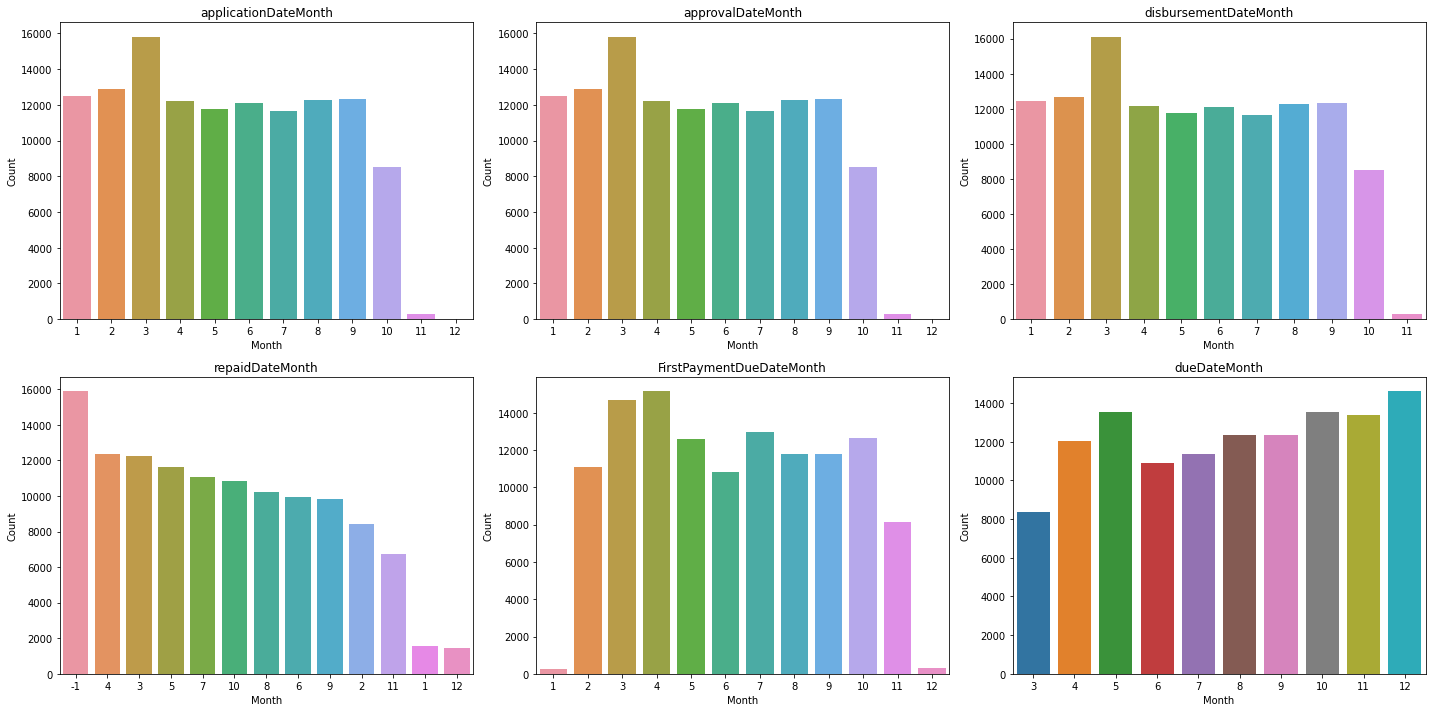

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns to plot
plot_cols = ['applicationDateMonth', 'approvalDateMonth', 'disbursementDateMonth', 'repaidDateMonth',
             'FirstPaymentDueDateMonth', 'dueDateMonth']

# Create a new figure and set its size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Plot bar chart for each column
for ax, col_name in zip(axs.flat, plot_cols):

    # Count number of instances for each category
    value_counts = df_copy[col_name].value_counts()

    # Plot bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    ax.set_title(col_name)
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Terlihat Bahwa untuk Atribut Waktu, semuanya cenderung terdistribusi Normal sehingga tidak ada suatu Bulan yang secara signifikan berpengaruh / khusus pada saat melakukan Pengajuan, Persetujuan, Pencairan serta Pembayaran Pinjaman

## Visualisasi Numerical Fitur (Histogram Distribution)

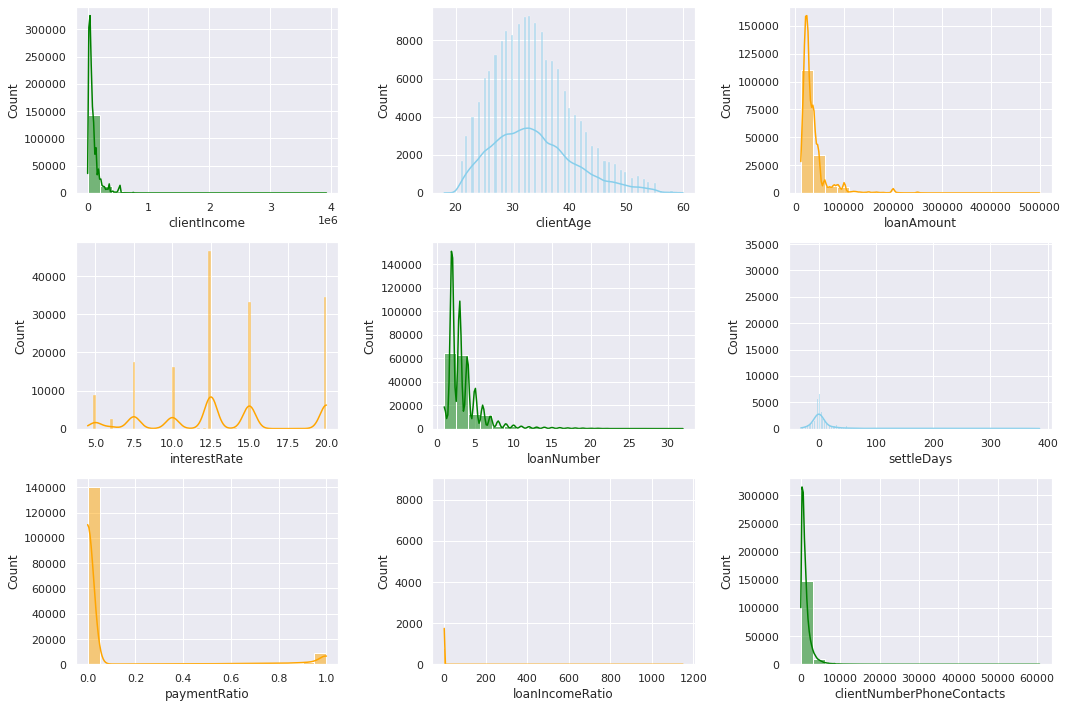

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

sns.histplot(data=df, x="clientIncome", kde=True, ax=axs[0, 0], color='green', bins=20)
sns.histplot(data=df, x="clientAge", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="loanAmount", kde=True, ax=axs[0, 2], color='orange', bins=20)
sns.histplot(data=df, x="interestRate", kde=True, ax=axs[1, 0], color='orange')

sns.histplot(data=df, x="loanNumber", kde=True, ax=axs[1, 1], color='green', bins=20)
sns.histplot(data=df, x="settleDays", kde=True, ax=axs[1, 2], color='skyblue')
sns.histplot(data=df, x="paymentRatio", kde=True, ax=axs[2, 0], color='orange', bins=20)
sns.histplot(data=df, x="loanIncomeRatio", kde=True, ax=axs[2, 1], color='orange')
sns.histplot(data=df, x="clientNumberPhoneContacts", kde=True, ax=axs[2, 2], color='green', bins=20)

plt.tight_layout()
plt.show()

Hanya beberapa Atribut Numerikal saja yang dilakukan Visualisasi Histogram Distribution yaitu clientIncome, clientAge, loanAmount dan interestRate. Hasilnya adalah diliat dari Grafik, bahwa Atribut teerdistribusi tidak Normal kecuali interestRate, sehingga nantinya atribut tersebut akan dilakukan standarisasi saat ingin digunakan modelling

## HeatMap

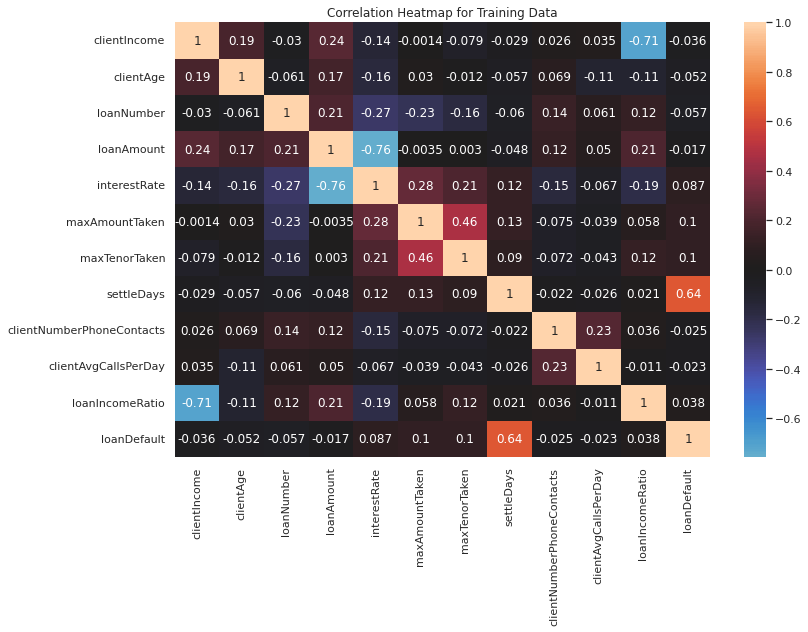

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


# select features and target
X = df_copy[['clientIncome', 'clientAge', 'loanNumber', 'loanAmount', 'interestRate',
        'maxAmountTaken', 'maxTenorTaken', 'settleDays', 'clientNumberPhoneContacts',
        'clientAvgCallsPerDay', 'loanIncomeRatio', 'loanDefault']]

# split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

# plot correlation matrix for training data
corr_matrix = X_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, center=0)
plt.title('Correlation Heatmap for Training Data')
plt.show()


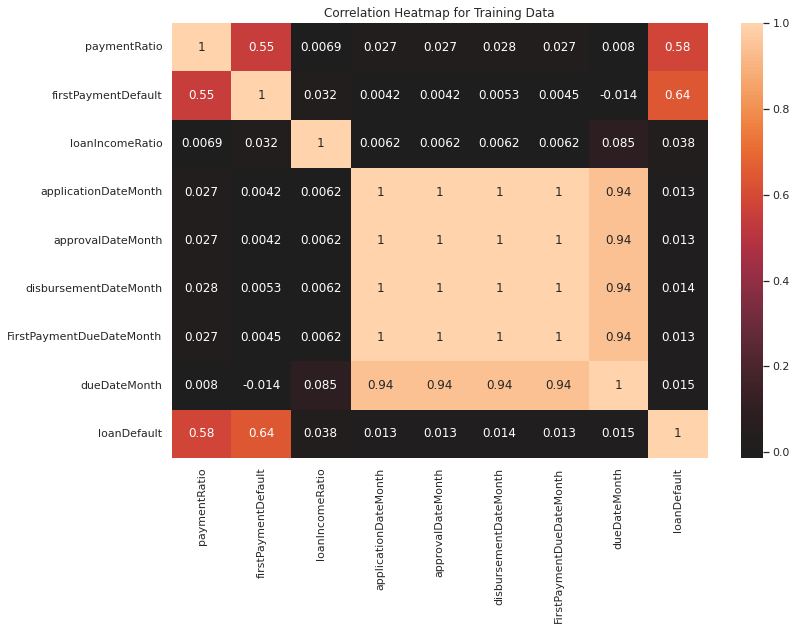

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


# select features and target
X = df_copy[['paymentRatio', 'firstPaymentDefault', 'loanIncomeRatio', 'applicationDateMonth',
               'approvalDateMonth', 'disbursementDateMonth', 'repaidDateMonth','FirstPaymentDueDateMonth', 'dueDateMonth', 'loanDefault']]

# split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

# plot correlation matrix for training data
corr_matrix = X_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, center=0)
plt.title('Correlation Heatmap for Training Data')
plt.show()


# Outlier

In [ ]:
import pandas as pd
import numpy as np

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_fence) & (df[col] <= upper_fence)]
    return df

columns = ['clientIncome', 'clientAge', 'loanAmount', 'loanIncomeRatio', 'loanNumber']
df_copy = remove_outliers(df_copy, columns)

Outlier dihilangkan dengan membuat fungsi dengan teknik IQR yang dimana membuat lower_fence untuk batas Q1 dan upper_fence untuk batas atas Q3. Diluar rentang yang telah ditentukan, maka akan termasuk Outlier. Dan pada langkah ini, hanya atribut dengan tipe numerikal tinggi dan non biner yang diterapkan IQR yaitu : 'clientIncome', 'clientAge', 'loanAmount', 'loanIncomeRatio', 'loanNumber'

In [ ]:
def count_outliers(df, column):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outlier_counts = {}

    for col in columns:
        outlier_count = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
        outlier_counts[col] = outlier_count
    return outlier_counts

outlier_counts = count_outliers(df_copy, columns)
print(outlier_counts)

{'clientIncome': 3186, 'clientAge': 1742, 'loanAmount': 2225, 'loanIncomeRatio': 1194, 'loanNumber': 0}


Dari hasil terlihat bahwa masih tersisa Outlier di beberapa atribut, namun seharusnya penghapusan Outlier dilakukan cukup sekali saja. Oleh karena itu outlier yang tersisa perlu dilihat apakah data tersebut valid dan masih wajar dalam data

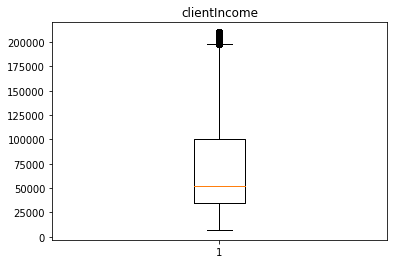

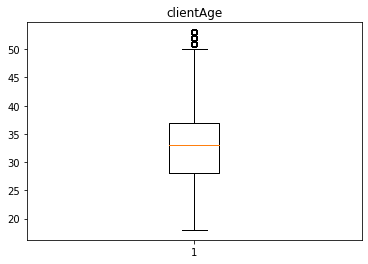

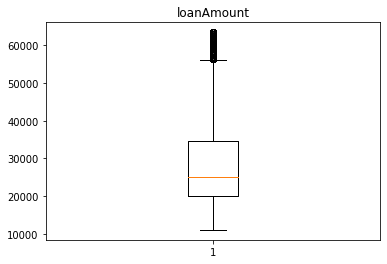

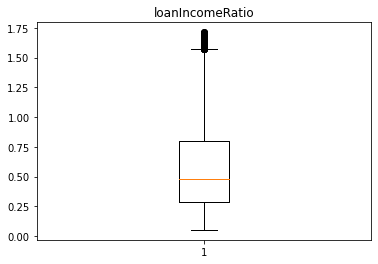

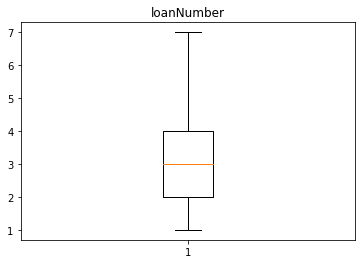

In [ ]:
import matplotlib.pyplot as plt

cols = ["clientIncome", "clientAge", "loanAmount", "loanIncomeRatio", 'loanNumber']

for col in cols:
    plt.figure()
    plt.boxplot(df_copy[col])
    plt.title(col)

Terlihat bahwa Outlier yang masih tersisa rupanya masih dekat dengan batas Q3. Serta setelah dilakukan pengecekan pada berkas CSV aslinya, disimpulkan bahwa Data tersebut masih valid dan wajar ada dalam data. Sehingga tidak boleh dilakukan penghapusan lagi, karena akan menyebabkan penghapusan data yang lebih banyak dan mengurangi kinerja model nantinya

# One Hot Encoding

In [ ]:
def one_hot_encoding(df_copy, columns):
    for col in columns:
        encoded_cols = pd.get_dummies(df_copy[col], prefix=col, prefix_sep='_')
        df_copy = pd.concat([df_copy, encoded_cols], axis=1)
        df_copy = df_copy.drop(col, axis=1)
    return df_copy

df_copy = one_hot_encoding(df_copy, ['clientGender', 'clientMaritalStatus', 'clientLoanPurpose', 'clientResidentialStatus', 'clientTimeAtEmployer'])

Dilakukan one Hot Encoding untuk kebutuhan

In [ ]:
import pandas as pd
df_copy['repaidDateMonth'] = df_copy['repaidDateMonth'].replace('Unpaid', -1)

# Handling Imbalance Data use SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Pisahkan dataset menjadi data training dan data testing
X = df_copy.drop(columns=['loanDefault'])
y = df_copy['loanDefault']
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print('Jumlah baris dan kolom dari data training:', X_train_full.shape)
print('Jumlah baris dan kolom dari data validasi:', X_valid_full.shape)


# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train)

Jumlah baris dan kolom dari data training: (97872, 45)
Jumlah baris dan kolom dari data validasi: (24468, 45)


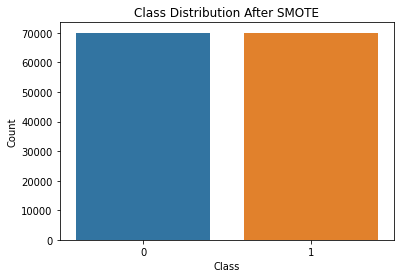

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate resampled X_train and y_train
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled = pd.Series(y_train_resampled)
train_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Plot class distribution
sns.countplot(x='loanDefault', data=train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Mengecek jumlah duplikasi pada X_train_resampled
print("Jumlah duplikasi pada X_train_resampled: ", X_train_resampled.duplicated().sum())

Jumlah duplikasi pada X_train_resampled:  1


In [ ]:
# Menghitung jumlah sampel pada setiap kelas target variabel setelah SMOTE
value_counts = y_train_resampled.value_counts()

# Menampilkan jumlah sampel pada setiap kelas target variabel
print("Jumlah sampel pada setiap kelas target variabel setelah SMOTE:\n", value_counts)

# Menghitung rasio kelas setelah SMOTE
ratio = value_counts[1] / value_counts[0]
print("Rasio kelas setelah SMOTE: ", ratio)

Jumlah sampel pada setiap kelas target variabel setelah SMOTE:
 0    70069
1    70069
Name: loanDefault, dtype: int64
Rasio kelas setelah SMOTE:  1.0
Jumlah duplikasi pada nilai 0: 140136


# Feature Selection

Feature Selection digunakan untuk mendapatkan fitur / atribut yang berpengaruh signifikan terhadap target variabel yang ingin diprediksi "Dalam kasus dataset ini adalah loanDefault". Feature Selection dilakukan melalui 3 Mwtode yaitu RFE, Univariate dan Correlation-Based Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Split data into X and y
X = df_copy.drop(['loanDefault'], axis=1)
y = df_copy['loanDefault']

# Split data into train and validation set
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

# Fix columns
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]
fix_cols = categorical_cols + numerical_cols
X_train = X_train_full[fix_cols].copy()
X_valid = X_valid_full[fix_cols].copy()

# Preprocessing
numerical_transformer = Pipeline(steps=[
    ('scalar', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Feature Selection with RFE
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=10, step=10, verbose=5)
rfe_transformer = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe_selector', rfe_selector)
])

X_train_rfe = rfe_transformer.fit_transform(X_train, y_train)
X_valid_rfe = rfe_transformer.transform(X_valid)

# Get selected columns from RFE
cat_transformer = preprocessor.named_transformers_['cat']
cat_cols = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_cols = np.append(cat_cols, numerical_cols)
rfe_selected_features = rfe_transformer.named_steps['rfe_selector'].get_support()
rfe_selected_cols = all_cols[rfe_selected_features]
print("Selected columns using RFE: ", rfe_selected_cols)

# Univariate Feature Selection
# Apply feature selection to categorical and numerical features
f_selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = f_selector.fit_transform(preprocessor.fit_transform(X_train_full), y_train)
X_valid_selected = f_selector.transform(preprocessor.transform(X_valid_full))

# Get selected columns from feature selection
cat_transformer = preprocessor.named_transformers_['cat']
cat_cols = cat_transformer.named_steps['onehot'].get_feature_names_out(categorical_cols)
all_cols = np.append(cat_cols, numerical_cols)
selected_features = f_selector.get_support()
selected_cols = all_cols[selected_features]

print('Univariate Feature Selection selected the following features:')
print(selected_cols)

# Correlation-based Feature Selection
# Get correlation matrix of numerical features
num_features = numerical_cols + ['loanDefault']
corr_matrix = df_copy[num_features].corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.5)]

# Drop the highly correlated features
df_copy.drop(to_drop, axis=1, inplace=True)

print('Correlation-based Feature Selection dropped the following features:')
print(to_drop)

Fitting estimator with 44 features.
Fitting estimator with 34 features.
Fitting estimator with 24 features.
Fitting estimator with 14 features.
Selected columns using RFE:  ['clientGender_FEMALE' 'clientGender_MALE' 'clientMaritalStatus_Married'
 'clientMaritalStatus_Separated' 'clientMaritalStatus_Single'
 'clientLoanPurpose_business' 'clientResidentialStatus_Employer Provided'
 'clientResidentialStatus_Family Owned'
 'clientResidentialStatus_Own Residence' 'clientResidentialStatus_Rented']
Univariate Feature Selection selected the following features:
['clientLoanPurpose_medical' 'clientLoanPurpose_other'
 'clientResidentialStatus_Employer Provided'
 'clientResidentialStatus_Family Owned'
 'clientResidentialStatus_Own Residence']
Correlation-based Feature Selection dropped the following features:
['interestRate', 'loanTerm', 'paymentRatio', 'firstPaymentDefault', 'loanIncomeRatio', 'approvalDateMonth', 'disbursementDateMonth', 'FirstPaymentDueDateMonth', 'dueDateMonth', 'loanDefault']

# Pipeline

Membangun Pipeline yang terdiri dari Data Splitting, Standarisasi dengan Robust Scaler, Kemudian di Modelling dengan 3 Algoritma yaitu : Random Forest, Support Vector Machine, dan Naive Bayes. Kemudian menggunakan Hyperparameter Tuning dengan RandomizedSearchCV untuk meningkatkan kinerja model. Dan terakhir evaluasi model dengan metriks F1-Score serta Confusion Matrix

## Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate

# separate the target variable
y = df_copy['loanDefault']
X = df_copy.drop('loanDefault', axis=1)

# split the data into train and validation sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=42)

# select the numeric columns for preprocessing
numeric_cols = ['interestRate', 'loanTerm', 'paymentRatio',
                'firstPaymentDefault', 'loanIncomeRatio',
                'approvalDateMonth', 'disbursementDateMonth',
                'FirstPaymentDueDateMonth', 'dueDateMonth']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# define the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                              ('rf', RandomForestClassifier(random_state=42))])

# fit the pipeline on training data
rf_pipeline.fit(X_train_full, y_train)

# predict the target variable on validation data
y_pred = rf_pipeline.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf_pipeline, X_train_full, y_train, scoring=scoring, cv=5)

# print the mean and standard deviation of each metric
print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1-score:", cv_results['test_f1'])


# define the hyperparameter grid
param_dist = {'n_estimators': [50, 100, 150, 200, 250],
              'max_depth': [5, 10, 15, 20, 25, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}

# create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# create a random search object
rfc_random = RandomizedSearchCV(estimator=rfc,
                                param_distributions=param_dist,
                                n_iter=10,
                                cv=5,
                                random_state=42,
                                n_jobs=-1)

# fit the random search object on the data
rfc_random.fit(X_train_full, y_train)

# print the best hyperparameters
print("Best hyperparameters:", rfc_random.best_params_)


Accuracy: 0.8111230857916238
Precision: 0.6462830743385132
Recall: 0.6982484798983574
F1-score: 0.6712615599371837
Accuracy: [0.80927318 0.80923141 0.81035131 0.81323364 0.81398555]
Precision: [0.64681869 0.64412172 0.64657686 0.65210717 0.65327755]
Recall: [0.69076969 0.70019546 0.70004511 0.70260111 0.704255  ]
F1-score: [0.66807211 0.67098912 0.67224949 0.67641311 0.67780913]
Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


## RF After Hyperparameter Tuning

Accuracy: 0.8443570014286073
Precision: 0.70827197921178
Recall: 0.7420818586078591
F1-score: 0.7247828399219995
Accuracy: [0.8459482  0.8452381  0.84602531 0.84585822 0.84615063]
Precision: [0.71360623 0.71066934 0.71181597 0.71050761 0.71151653]
Recall: [0.74428743 0.7471057  0.74906029 0.75131559 0.75056382]
F1-score: [0.72862399 0.72843216 0.72996337 0.73034201 0.73051877]


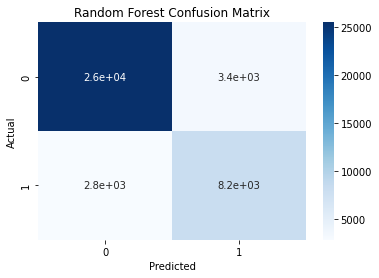

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

# define the numeric columns for preprocessing
numeric_cols = ['interestRate', 'loanTerm', 'paymentRatio', 'firstPaymentDefault', 'loanIncomeRatio', 'approvalDateMonth', 'disbursementDateMonth', 'FirstPaymentDueDateMonth', 'dueDateMonth']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols)
])

# define the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                              ('rf', RandomForestClassifier(n_estimators=250,
                                                            min_samples_split=2,
                                                            min_samples_leaf=1,
                                                            max_features='log2',
                                                            max_depth=15,
                                                            random_state=42))])

# fit the pipeline on training data
rf_pipeline.fit(X_train_full, y_train)

# predict the target variable on validation data
y_pred = rf_pipeline.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rf_pipeline, X_train_full, y_train, scoring=scoring, cv=5)

# print the mean and standard deviation of each metric
print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1-score:", cv_results['test_f1'])

# Confusion Matrix
cm_rf = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Naive *Bayes*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate

# separate the target variable
y = df_copy['loanDefault']
X = df_copy.drop('loanDefault', axis=1)

# split the data into train and validation sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=42)

# select the numeric columns for preprocessing
numeric_cols = ['interestRate', 'loanTerm', 'paymentRatio',
                'firstPaymentDefault', 'loanIncomeRatio',
                'approvalDateMonth', 'disbursementDateMonth',
                'FirstPaymentDueDateMonth', 'dueDateMonth']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# define the pipeline
nb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                              ('nb', GaussianNB())])

# fit the pipeline on training data
nb_pipeline.fit(X_train_full, y_train)

# predict the target variable on validation data
y_pred = nb_pipeline.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(nb_pipeline, X_train_full, y_train, scoring=scoring, cv=5)

# print the mean and standard deviation of each metric
print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1-score:", cv_results['test_f1'])

# define the hyperparameters to search
hyperparameters = {'nb__var_smoothing': np.logspace(-20, 0, num=100)}

# create a grid search object
nb_gridsearch = GridSearchCV(nb_pipeline, hyperparameters, cv=5, n_jobs=-1)

# fit the grid search object on training data
nb_gridsearch.fit(X_train_full, y_train)

# print the best hyperparameters
print("Best hyperparameters:", nb_gridsearch.best_params_)

Accuracy: 0.8429295406244891
Precision: 1.0
Recall: 0.44800643456279443
F1-score: 0.618790668147913
Accuracy: [0.84649338 0.84442265 0.8501989  0.84682034 0.84485859]
Precision: [1. 1. 1. 1. 1.]
Recall: [0.45972382 0.45243575 0.47286673 0.46097795 0.45407478]
F1-score: [0.62987781 0.62300277 0.64210389 0.63105394 0.62455493]
Best hyperparameters: {'nb__var_smoothing': 0.0009326033468832181}


## NB after Hyperparameter Tuning

Accuracy: 0.8515612228216446
Precision: 0.7580265278294286
Recall: 0.7026312765712972
F1-score: 0.7292784734645199
Accuracy: [0.85695602 0.85063484 0.85303253 0.85221514 0.85706501]
Precision: [0.76337742 0.75035432 0.74950456 0.75267515 0.77645051]
Recall: [0.71960107 0.71077867 0.72521572 0.71486098 0.69798658]
F1-score: [0.74084312 0.73003053 0.73716012 0.73328088 0.73513077]


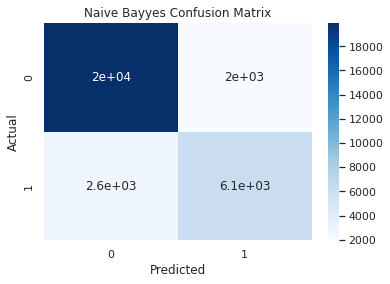

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate

# separate the target variable
y = df_copy['loanDefault']
X = df_copy.drop('loanDefault', axis=1)

# split the data into train and validation sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=42)

# select the numeric columns for preprocessing
numeric_cols = ['interestRate', 'loanTerm', 'paymentRatio',
                'firstPaymentDefault', 'loanIncomeRatio',
                'approvalDateMonth', 'disbursementDateMonth',
                'FirstPaymentDueDateMonth', 'dueDateMonth']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])


# define the pipeline
nb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                              ('nb', GaussianNB(var_smoothing= 0.0009326033468832181))])

# fit the pipeline on training data
nb_pipeline.fit(X_train_full, y_train)

# predict the target variable on validation data
y_pred = nb_pipeline.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(nb_pipeline, X_train_full, y_train, scoring=scoring, cv=5)

# print the mean and standard deviation of each metric
print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1-score:", cv_results['test_f1'])

# Confusion Matrix
cm_nb = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm_nb, annot=True, cmap='Blues')
plt.title('Naive Bayyes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate

# separate the target variable
y = df_copy['loanDefault']
X = df_copy.drop('loanDefault', axis=1)

# split the data into train and validation sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=42)

# select the numeric columns for preprocessing
numeric_cols = ['interestRate', 'loanTerm', 'paymentRatio',
                'firstPaymentDefault', 'loanIncomeRatio',
                'approvalDateMonth', 'disbursementDateMonth',
                'FirstPaymentDueDateMonth', 'dueDateMonth']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# define the pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                              ('lr', LogisticRegression(random_state=42))])

# fit the pipeline on training data
lr_pipeline.fit(X_train_full, y_train)

# predict the target variable on validation data
y_pred = lr_pipeline.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(lr_pipeline, X_train_full, y_train, scoring=scoring, cv=5)

# print Cross Validation
print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1-score:", cv_results['test_f1'])


# define the hyperparameter grid
param_dist = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10],
              'solver': ['lbfgs', 'sag', 'saga'],
              'max_iter': [100, 200, 500],
              'class_weight': ['balanced', {0: 0.3, 1: 0.7}]}

# create a logistic regression object
lr = LogisticRegression(random_state=42)

# create a random search object
lr_random = RandomizedSearchCV(estimator=lr,
                                param_distributions=param_dist,
                                n_iter=10,
                                cv=5,
                                random_state=42,
                                n_jobs=-1)

# fit the random search object on the data
lr_random.fit(X_train_full, y_train)

# print the best hyperparameters
print("Best hyperparameters:", lr_random.best_params_)


Accuracy: 0.851495831289848
Precision: 0.7229186756669881
Recall: 0.7752499138228197
F1-score: 0.7481703260146374
Accuracy: [0.85101629 0.84774672 0.84878208 0.8478557  0.85216065]
Precision: [0.72032694 0.71400778 0.71501586 0.71423519 0.72516199]
Recall: [0.77752206 0.7742616  0.77794823 0.77449664 0.7725791 ]
F1-score: [0.7478325  0.74291498 0.74515566 0.74314627 0.74811995]


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver sa

Best hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'max_iter': 200, 'class_weight': 'balanced', 'C': 1}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## LR after Hyperparameter Tuning

Accuracy: 0.851495831289848
Precision: 0.7229186756669881
Recall: 0.7752499138228197
F1-score: 0.7481703260146374
Accuracy: [0.85101629 0.84774672 0.84878208 0.8478557  0.85216065]
Precision: [0.72032694 0.71400778 0.71501586 0.71423519 0.72516199]
Recall: [0.77752206 0.7742616  0.77794823 0.77449664 0.7725791 ]
F1-score: [0.7478325  0.74291498 0.74515566 0.74314627 0.74811995]


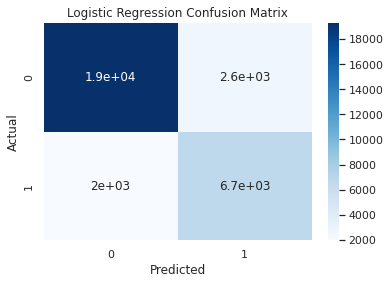

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

# separate the target variable
y = df_copy['loanDefault']
X = df_copy.drop('loanDefault', axis=1)

# split the data into train and validation sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=42)

# select the numeric columns for preprocessing
numeric_cols = ['interestRate', 'loanTerm', 'paymentRatio',
                'firstPaymentDefault', 'loanIncomeRatio',
                'approvalDateMonth', 'disbursementDateMonth',
                'FirstPaymentDueDateMonth', 'dueDateMonth']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# define the pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                              ('lr', LogisticRegression(random_state=42, solver='sag', penalty='l2', max_iter=200, class_weight='balanced', C= 1))])

# fit the pipeline on training data
lr_pipeline.fit(X_train_full, y_train)

# predict the target variable on validation data
y_pred = lr_pipeline.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(lr_pipeline, X_train_full, y_train, scoring=scoring, cv=5)

# print the mean and standard deviation of each metric
print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1-score:", cv_results['test_f1'])

# Confusion Matrix
cm_lr = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

# separate the target variable
y = df_copy['loanDefault']
X = df_copy.drop('loanDefault', axis=1)

# split the data into train and validation sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=42)

# select the numeric columns for preprocessing
numeric_cols = ['interestRate', 'loanTerm', 'paymentRatio',
                'firstPaymentDefault', 'loanIncomeRatio',
                'approvalDateMonth', 'disbursementDateMonth',
                'FirstPaymentDueDateMonth', 'dueDateMonth']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# define the pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                               ('xgb', XGBClassifier(random_state=42))])

# define the hyperparameter grid
param_dist = {'xgb__max_depth': [3, 5, 7, 9, 11],
              'xgb__learning_rate': [0.05, 0.1, 0.15, 0.2],
              'xgb__min_child_weight': [1, 2, 3, 4, 5],
              'xgb__subsample': [0.6, 0.7, 0.8, 0.9],
              'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
              'xgb__gamma': [0, 0.1, 0.2, 0.3],
              'xgb__reg_alpha': [0, 0.1, 0.5, 1],
              'xgb__reg_lambda': [0.1, 1, 10],
              'xgb__n_estimators': [200, 300, 400, 500, 600]}

# create a random search object
xgb_random = RandomizedSearchCV(estimator=xgb_pipeline,
                                param_distributions=param_dist,
                                n_iter=20,
                                cv=5,
                                random_state=42,
                                n_jobs=-1)

# fit the random search object on the data
xgb_random.fit(X_train_full, y_train)

# print the best hyperparameters
print("Best hyperparameters:", xgb_random.best_params_)

# fit the pipeline on training data with best hyperparameters
xgb_pipeline.set_params(**xgb_random.best_params_)
xgb_pipeline.fit(X_train_full, y_train)

# predict the target variable on validation data
y_pred = xgb_pipeline.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(xgb_pipeline, X_train_full, y_train, scoring=scoring, cv=5)

# print the mean and standard deviation of each metric
print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1-score:", cv_results['test_f1'])


Best hyperparameters: {'xgb__subsample': 0.8, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 1, 'xgb__n_estimators': 200, 'xgb__min_child_weight': 4, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.7}
Accuracy: 0.8504168710152036
Precision: 0.7198083067092652
Recall: 0.7766287487073423
F1-score: 0.7471397778146245
Accuracy: [0.84872759 0.84703831 0.84850962 0.8479102  0.85107079]
Precision: [0.714085   0.71207048 0.71340929 0.71375661 0.72129101]
Recall: [0.77982355 0.77502877 0.78044104 0.77603068 0.77564717]
F1-score: [0.74550788 0.74221692 0.74542125 0.7435921  0.74748221]


## XGB after Hyperparameter Tuning

Accuracy: 0.8504168710152036
Precision: 0.7198083067092652
Recall: 0.7766287487073423
F1-score: 0.7471397778146245
Accuracy: [0.84872759 0.84703831 0.84850962 0.8479102  0.85107079]
Precision: [0.714085   0.71207048 0.71340929 0.71375661 0.72129101]
Recall: [0.77982355 0.77502877 0.78044104 0.77603068 0.77564717]
F1-score: [0.74550788 0.74221692 0.74542125 0.7435921  0.74748221]


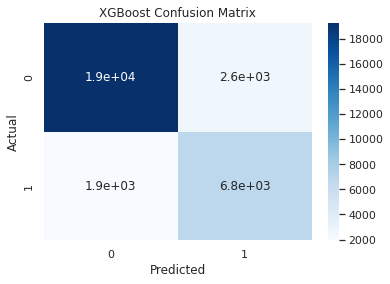

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

# separate the target variable
y = df_copy['loanDefault']
X = df_copy.drop('loanDefault', axis=1)

# split the data into train and validation sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=42)

# select the numeric columns for preprocessing
numeric_cols = ['interestRate', 'loanTerm', 'paymentRatio',
                'firstPaymentDefault', 'loanIncomeRatio',
                'approvalDateMonth', 'disbursementDateMonth',
                'FirstPaymentDueDateMonth', 'dueDateMonth']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# define the pipeline with best hyperparameters
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                               ('xgb', XGBClassifier(random_state=42, subsample=0.8, reg_lambda=0.1, reg_alpha=1,
                                                     n_estimators=200, min_child_weight=4, max_depth=5,
                                                     learning_rate=0.05, gamma=0.1, colsample_bytree=0.7))])


# predict the target variable on validation data
xgb_pipeline.fit(X_train_full, y_train)
y_pred = xgb_pipeline.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# perform cross-validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(xgb_pipeline, X_train_full, y_train, scoring=scoring, cv=5)

# print the mean and standard deviation of each metric
print("Accuracy:", cv_results['test_accuracy'])
print("Precision:", cv_results['test_precision'])
print("Recall:", cv_results['test_recall'])
print("F1-score:", cv_results['test_f1'])

cm_xgb = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm_xgb, annot=True, cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Testing Use All Feature

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import cross_validate

# separate the target variable
y = df_copy['loanDefault']
X = df_copy.drop('loanDefault', axis=1)

# split the data into train and validation sets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, random_state=42)

# select the numeric and categorical columns for preprocessing
numeric_cols = ['clientIncome', 'incomeVerified', 'clientAge',
                'loanNumber', 'loanAmount',
                'interestRate', 'loanTerm', 'maxAmountTaken', 'maxTenorTaken',
                'paymentRatio', 'firstPaymentDefault', 'loanIncomeRatio', 'applicationDateMonth',
                'approvalDateMonth', 'disbursementDateMonth', 'repaidDateMonth', 'FirstPaymentDueDateMonth',
                'dueDateMonth']

categorical_cols = ['clientGender', 'clientMaritalStatus', 'clientLoanPurpose', 'clientResidentialStatus','clientTimeAtEmployer']

# define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# define the pipeline
nb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                              ('nb', GaussianNB(var_smoothing=1e-11))])

# define the hyperparameters to search
hyperparameters = {'nb__var_smoothing': np.logspace(-20, 0, num=100)}

# define the randomized search
rand_search = RandomizedSearchCV(nb_pipeline, hyperparameters, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# fit the randomized search on training data
rand_search.fit(X_train_full, y_train)

# predict the target variable on validation data using the best estimator found
y_pred = rand_search.best_estimator_.predict(X_valid_full)

# evaluate the model using accuracy score
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8484924434196346
Precision: 0.7554437140509449
Recall: 0.6674834376985207
F1-score: 0.7087448807516261
